In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Exercise1

In [32]:
def sigm(x):
  return 1/ (1+ np.e**(-5*(x-1)))

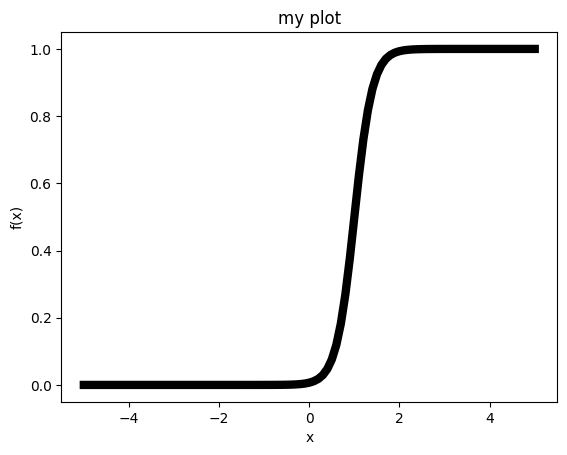

In [33]:
x= np.arange(-5,5.1,.1)
y=sigm(x)
plt.plot(x,y,c="black" ,linewidth =6)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("my plot")
plt.savefig("my fig.png")
plt.show()

#Exercise2

In [34]:
df= pd.read_csv("/content/heights_weights.csv")
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [35]:
df.describe()

,Height,Weight
count,16.000000,19.000000
mean,1.656250,61.569474
std,0.112598,7.593113
min,1.470000,52.210000
25%,1.565000,55.160000
50%,1.665000,59.930000
75%,1.742500,67.190000
max,1.830000,75.210000


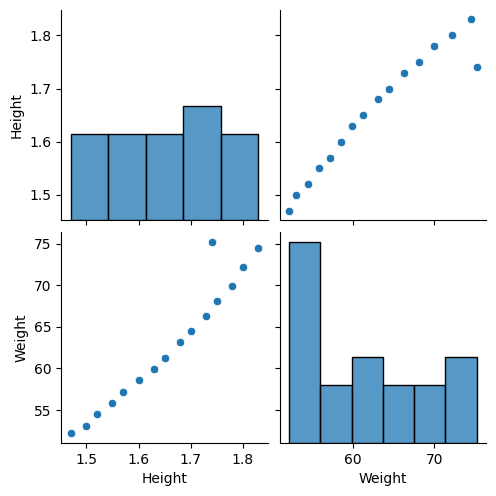

In [36]:
sns.pairplot(df)

<Axes: ylabel='Count'>

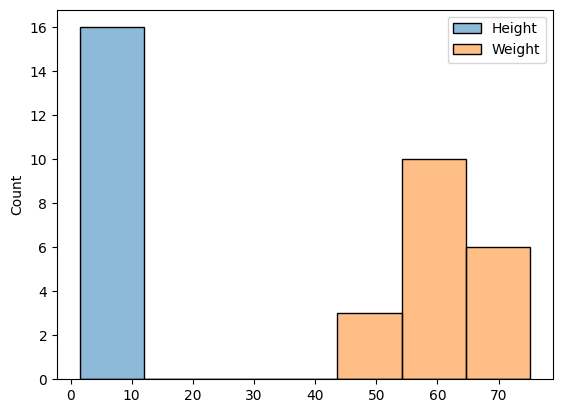

In [37]:
sns.histplot(df)

<Axes: >

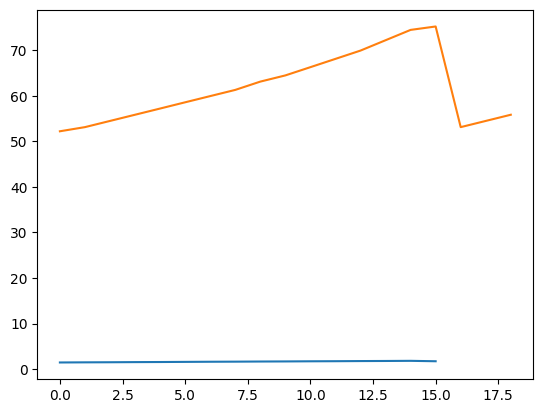

In [38]:
df["Height"].plot()
df["Weight"].plot()

Based on the last picture, I discovered that there is something strange, related between the index values and Weight values , that perhaps we should resort a certain value or something like that.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  16 non-null     float64
 1   Weight  19 non-null     float64
dtypes: float64(2)
memory usage: 432.0 bytes


**Does the dataset need preprocessing?**

Yes, the data need preprocessing; becouse it has null values inside Height column

In [40]:
df.isnull().sum()

Height    3
Weight    0
dtype: int64

The data is **numarical** so one of the common practise at this case is fill the null values using the mean :)

In [41]:
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [42]:
df.Height.mean()

1.65625

**But wait** !! I think that i **find pattern** here !!

The data **increases together**, so that when the Height value increases, the Weight value also increases, and vice versa.

Therefore, **the best** thing we can do is to **resorting the data according to the Weight values** in ascending order, and then **fill the null values** so that they take the value of the **one before or after it.**

In [43]:
new_df = df.sort_values("Weight")
new_df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
16,NaN,53.12
2,1.52,54.48
17,NaN,54.48
18,NaN,55.84
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93


In [44]:
#modifing the index values
new_df=new_df.reset_index().drop("index",axis=1)

Text(50.722222222222214, 0.5, 'Index')

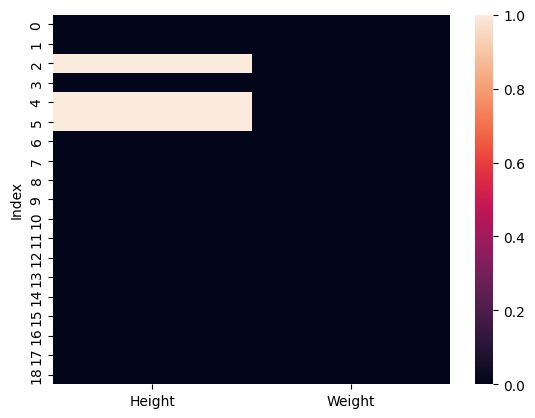

In [45]:
sns.heatmap(new_df.isnull())
plt.ylabel("Index")

In [46]:
new_df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,NaN,53.12
3,1.52,54.48
4,NaN,54.48
5,NaN,55.84
6,1.55,55.84
7,1.57,57.20
8,1.60,58.57
9,1.63,59.93


Ooh, my God

The data it's **not just increases together**, i find a another thing !!

The Weight values accompanying the null values are **duplicates**, meaning that **we can replace the Hight values precisely by taking the Hight value that has the same Weight as the null values.**

In [47]:
new_df["Height"].fillna(method="ffill",inplace=True)
new_df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.50,53.12
3,1.52,54.48
4,1.52,54.48
5,1.52,55.84
6,1.55,55.84
7,1.57,57.20
8,1.60,58.57
9,1.63,59.93


**The value at Index 5** It took the value before it, while it should take the value after it, so we must modify its value

In [48]:
new_df.loc[5,:] = new_df.loc[6,:]
new_df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.50,53.12
3,1.52,54.48
4,1.52,54.48
5,1.55,55.84
6,1.55,55.84
7,1.57,57.20
8,1.60,58.57
9,1.63,59.93


In [49]:
new_df.isnull().sum()

Height    0
Weight    0
dtype: int64

Now it's all done , let's complete our working

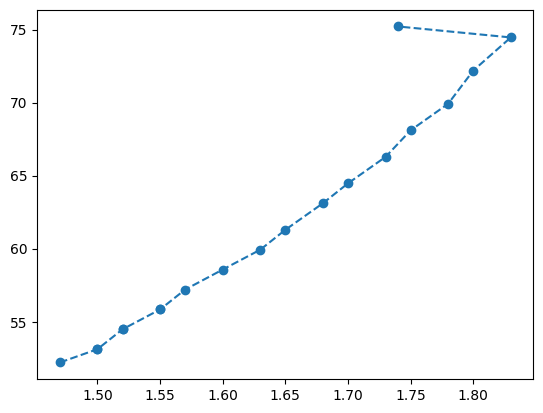

In [50]:
plt.plot(new_df["Height"],new_df["Weight"], '--', marker='o');

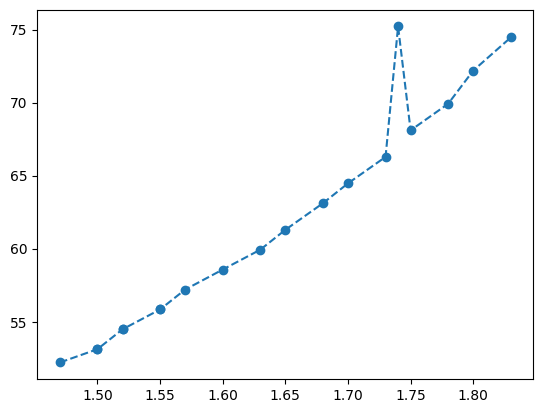

In [51]:
Height_sorted_df=new_df.sort_values("Height")
plt.plot(Height_sorted_df["Height"] , Height_sorted_df["Weight"], '--', marker='o');

{'whiskers': [<matplotlib.lines.Line2D at 0x7e0dad675570>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0dad675ab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0dad6752d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0dad675ff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0dad676290>],
 'means': []}

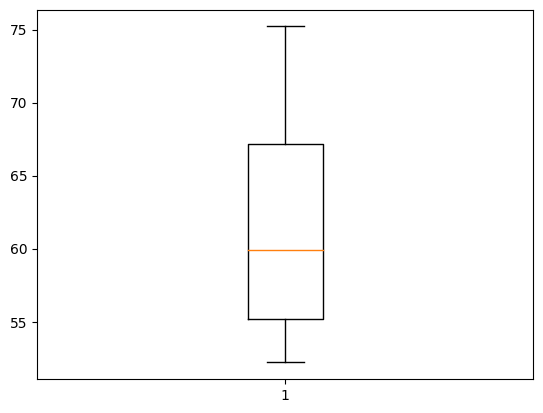

In [52]:
plt.boxplot( Height_sorted_df["Weight"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e0dad6c35b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0dad6c3af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0dad6c3310>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0dad6c3fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0dad704280>],
 'means': []}

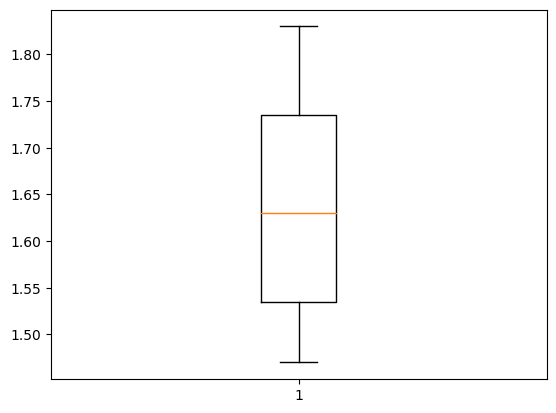

In [53]:
plt.boxplot( Height_sorted_df["Height"] )

I thought that there were outliers, but **according to the last visualization it wasn't outliers so we can't modify it or drop it**. :(

###**Bulid ower model**

In [54]:
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split ,KFold ,cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [55]:
LR= LinearRegression()
La= Lasso()
DTR= DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
XGB = XGBRegressor()
GBR = GradientBoostingRegressor()

#Models = [LR, La , DTR , RFR , KNR , XGB , GBR ]

In [56]:
Models = {
    'LinearRegression' : LR ,
    'Lasso' : La ,
    'DecisionTreeRegressor' : DTR ,
    'RandomForestRegressor': RFR ,
    'KNeighborsRegressor' : KNR ,
    'XGBRegressor' : XGB ,
    'GradientBoostingRegressor' : GBR ,
    }

In [57]:
#X & Y
X= new_df["Height"]
Y= new_df["Weight"]

#Train Test Split
X_train, X_test, y_train, y_test  = train_test_split(X,Y,test_size=.25,random_state=0)
X_train , X_test = np.array(X_train ).reshape(-1,1) , np.array(X_test ).reshape(-1,1)

#X_train.values.reshape(-1,1) X_test.values.reshape(-1,1)

In [58]:
for i,model_name in  enumerate(Models):
    model = Models[model_name]
    model.fit(X_train, y_train)
    Ypre= model.predict(X_test)

    MSE=mean_squared_error(Ypre,y_test)
    MAE=abs(np.sqrt(MSE))
    print("{} -> MSE: {}".format(model_name,MSE))
    print("{} -> MAE: {}".format(model_name,MAE))
    print(".......New........")

LinearRegression -> MSE: 11.653175739400499
LinearRegression -> MAE: 3.4136748145364546
.......New........
Lasso -> MSE: 64.23623561224481
Lasso -> MAE: 8.014751126032849
.......New........
DecisionTreeRegressor -> MSE: 17.35675999999997
DecisionTreeRegressor -> MAE: 4.166144500614443
.......New........
RandomForestRegressor -> MSE: 15.934469290000015
RandomForestRegressor -> MAE: 3.991800256776385
.......New........
KNeighborsRegressor -> MSE: 13.351397600000013
KNeighborsRegressor -> MAE: 3.653956431048407
.......New........
XGBRegressor -> MSE: 17.355380122108592
XGBRegressor -> MAE: 4.1659788912221565
.......New........
GradientBoostingRegressor -> MSE: 17.357468536095176
GradientBoostingRegressor -> MAE: 4.166229534734636
.......New........


In [59]:
print("Cross-validation Mean Squared Error:\n")
X=np.array(X).reshape(-1,1)
for i,model_name in  enumerate(Models):
    model = Models[model_name]

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model,  X, Y, cv=kfold, scoring='neg_mean_squared_error',error_score='raise')

    print("{} -> CV_MSE: {}".format(model_name,-cv_results.mean()))
    print("cv_results:",-cv_results)
    print("\n.......New........")

Cross-validation Mean Squared Error:

LinearRegression -> CV_MSE: 3.701303892340866
cv_results: [ 1.1606806   0.83610582  0.87250916 14.59166433  1.04555955]

.......New........
Lasso -> CV_MSE: 58.1501636086805
cv_results: [66.829306   49.59865    82.193011   66.93320378 25.19664727]

.......New........
DecisionTreeRegressor -> CV_MSE: 12.746041666666647
cv_results: [ 0.669425   21.693675    3.03885    20.861025   17.46723333]

.......New........
RandomForestRegressor -> CV_MSE: 7.298276510166692
cv_results: [ 0.68761349 11.03162551  3.29952213 16.42754477  5.04507664]

.......New........
KNeighborsRegressor -> CV_MSE: 5.609534533333332
cv_results: [ 4.404986    1.733747    7.35246    13.436477    1.12000267]

.......New........
XGBRegressor -> CV_MSE: 8.902128324156394
cv_results: [ 1.03563992  2.57637655  2.57850052 20.86133219 17.45879243]

.......New........
GradientBoostingRegressor -> CV_MSE: 12.743434508418606
cv_results: [ 0.66996512 21.68603675  3.0388653  20.86147709 17.4608

As we can see , the best model at all is **LinearRegression**

So this will be our model

LinearRegression -> MSE: 11.653175739400499
LinearRegression -> MAE: 3.4136748145364546


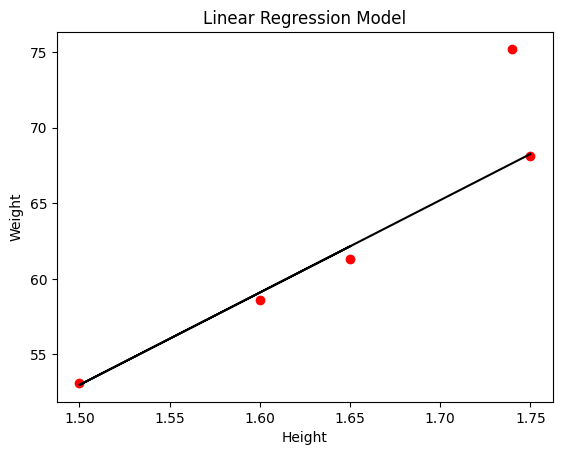

In [60]:
# plot    X test -- y pred
# scatter X test -- y test
Best_Model = LinearRegression()
Best_Model.fit(X_train,y_train)
y_pred = Best_Model.predict(X_test)

MSE=mean_squared_error(y_pred,y_test)
MAE=abs(np.sqrt(MSE))
print("{} -> MSE: {}".format("LinearRegression",MSE))
print("{} -> MAE: {}".format("LinearRegression",MAE))

plt.scatter(X_test,y_test , c="red")
plt.plot( X_test , y_pred , c="black")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Linear Regression Model")
plt.show()

**At the first Exercise:**

I wrote a function that represents the f(x) which represents a type of sigm function, then I plotted it using matplotlib.pyplot with interval [-5,5], linewidth = 6, and black color for the curve.


**At the second exercise:**

I read the file easily using the read_csv method and displayed the first 5 rows to see it and understand its features, then I checked the statistical description of the dataset using the describe method to explore the summary statistics and understand more about the data.


After that, I Visualize the dataset to explore it more, trying to find a few patterns, understand it better, and explore the relationship between them. During the visualization, I discovered that there was something strange but I didn't know what it was specifically!

so I decided to see the info about the data and the null values then I discovered that there are null values and I decided to fill it in because it is numerical data and one of the common practices in this case is to fill the null values using the mean.

While filling null values **I find a pattern** in the data!

The data **increases together**, so that when the Height value increases, the Weight value also increases, and vice versa.

Therefore, **the best** thing we can do is to **resorting the data according to the Weight values** in ascending order, and then **fill the null values** so that they take the value of the **one before or after it.**


**Also, I find another pattern** here !!
The data is **not just increasing together**, I found another thing !!
The Weight values accompanying the null values are **duplicates**, meaning that **we can replace the height values precisely by taking the height value that has the same weight as the null values.**

To do that I used the fillna method and gave the parameter 'method' 'ffill' value to fill it forward. **But The value at Index 5** took the value before it, while it should take the value after it, so I modified its value.


After that I visualized the data for the second time to see the relationship again, at that time I thought that there were **outliers**, but **according to the visualization it wasn't outliers so we can't modify it or drop it**.

**Then** I started building my model, so I put 7 algo. In one dictionary and specify X, Y and split the data into Training and Testing.


**After that** I started fitting and predicting on each model and printed the MSE & MAE for each one by looping on the dictionary, **Then** I looped on them again and applied the cross-validation with KFold n_splits=5 and printed the mean for each one.

**The Best model was LinearRegression**

**Finally**, I approve the LinearRegression Model and visualize its predicted